# 遗传算法

### 1. 使用遗传算法求解该函数的最大值：$f(x,y) = 100*(x-y)^2 + (1-x)^2$

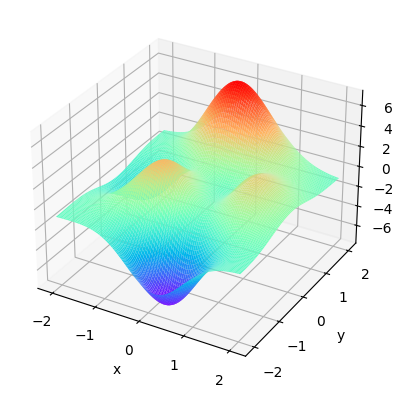

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

n = 2.048
fig = plt.figure()
ax2 = plt.axes(projection='3d')
x1 = np.linspace(-n, n, 100)
x2 = np.linspace(-n, n, 100)


def func(x, y):
    return 3 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(
        -x ** 2 - y ** 2) - 1 / 3 ** np.exp(-(x + 1) ** 2 - y ** 2)


x, y = np.meshgrid(x1, x2)
ax2.plot_surface(x, y, func(x, y), cmap='rainbow', rstride=1, cstride=1)
# ax2.set_zlim(-10, 10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
plt.pause(3)
plt.show()
plt.ion()

In [2]:
x_bound = [-n, n]
y_bound = [-n, n]

DNA_SIZE = 10


def decode(matrix):
    """
    该函数用于解码
    :param matrix:
    :return:
    """
    y_pop = matrix[:, 1::2]
    x_pop = matrix[:, ::2]  # 分别取出奇数列与偶数列，也就是x坐标与y坐标
    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / (2 ** DNA_SIZE - 1) * (x_bound[-1] - x_bound[0]) + x_bound[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / (2 ** DNA_SIZE - 1) * (y_bound[-1] - y_bound[0]) + y_bound[0]

    return x, y


def get_fitness(matrix):
    """
    获取每个个体的适应度，首先对基因进行解码，之后传入到评估函数之中，返回适应度。
    :param matrix:
    :return:
    """
    x, y = decode(matrix)
    fit = func(x, y)
    return fit - np.min(fit) + 1e-3


def select(fit, pop):
    """
    随机选择函数
    :param fit:每个个体的适应度
    :param pop: 种群
    :return: 选择后的种群
    """
    idx = np.random.choice(np.arange(POP_SIZE), p=fit / np.sum(fit), size=POP_SIZE, replace=True)
    return pop[idx]


def crossover_mutation(pop, CROSS_RATE=0.8):
    """
    交叉与编译函数
    :param pop:
    :return:
    """
    new_pop = []
    for father in pop:
        child = father
        if np.random.random() < CROSS_RATE:  # 以一定的概率进行交叉
            mother = np.random.randint(0, 200)
            mother = pop[mother]
            cross_point = np.random.randint(DNA_SIZE * 2)
            child[cross_point] = mother[cross_point]

        child = mutation(child)
        new_pop.append(child)

    return np.array(new_pop)


def mutation(child, MUTATION_RATE=0.03):
    """
    变异函数
    :param child: 子代的DNA
    :param MUTATION_RATE: 变异的概率，默认为0.03
    :return: 变异后的子代
    """
    if np.random.random() < MUTATION_RATE:
        mutation_point = np.random.randint(0, DNA_SIZE * 2)
        child[mutation_point] = child[mutation_point] ^ 1
    return child

随机生成种群。`randint(2,size = (popsize,dna_size)`的含义为：$dna\in[0,2) \wedge dna \in Z$

In [3]:
# 首先进行初始化

POP_SIZE = 200
DNA_SIZE = 10

pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))

In [4]:
N_GENERATION = 512
for _ in range(N_GENERATION):
    pop = crossover_mutation(pop)
    fit = get_fitness(pop)
    pop = select(fit, pop)

In [5]:
fit = get_fitness(pop)  # 进化到最后的种群应该是最优的群体

In [6]:
# np.argmax(fit)
fit  # 整个群体的适应度矩阵

array([3.31750407e+00, 3.36226514e+00, 3.35693513e+00, 3.36294198e+00,
       3.32138461e+00, 3.35970815e+00, 3.35497612e+00, 3.36156330e+00,
       3.35952413e+00, 3.35970815e+00, 3.33629552e+00, 3.35953322e+00,
       3.31750407e+00, 3.36129402e+00, 3.35228445e+00, 3.35917426e+00,
       3.36192618e+00, 3.33629552e+00, 3.33629552e+00, 3.35012038e+00,
       3.35917426e+00, 3.36294198e+00, 3.36294198e+00, 3.36294198e+00,
       3.36082294e+00, 3.34908286e+00, 3.35012038e+00, 3.36192618e+00,
       3.31750407e+00, 3.35811667e+00, 3.36192618e+00, 3.35497612e+00,
       3.36220943e+00, 3.35693513e+00, 3.36156330e+00, 3.36369839e+00,
       3.35698314e+00, 3.35497612e+00, 3.35953322e+00, 3.35917426e+00,
       3.35698314e+00, 3.36156330e+00, 3.36129402e+00, 3.35957145e+00,
       3.36156330e+00, 3.35698314e+00, 3.36156330e+00, 3.35012038e+00,
       3.35745095e+00, 3.35745095e+00, 3.35957145e+00, 3.36156330e+00,
       3.36294198e+00, 3.35811667e+00, 3.35012038e+00, 3.35917426e+00,
      

In [7]:
pop[np.argmax(fit)]  # 返回适应度最高的个体

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [8]:
def getFinalAns(arr):
    x = arr[::2]
    y = arr[1::2]
    x = x.dot(2 ** np.arange(DNA_SIZE)[::-1]) / (2 ** DNA_SIZE - 1) * (x_bound[-1] - x_bound[0]) + x_bound[0]
    y = y.dot(2 ** np.arange(DNA_SIZE)[::-1]) / (2 ** DNA_SIZE - 1) * (y_bound[-1] - y_bound[0]) + y_bound[0]

    return x, y


x, y = getFinalAns(pop[np.argmax(fit)])

In [11]:
# plt.scatter(x,y,func(x,y),c='k',s=5)
# ax2.scatter(x,y,func(x,y),c='k',s=5)
# plt.show()
plt.ion()
ax2.scatter(x, y, func(x, y), c='black', marker='o')
plt.show()
# plt.pause(0.02)
plt.ioff()

In [161]:
print(x, y)

0.0020019550342129655 1.5354995112414467


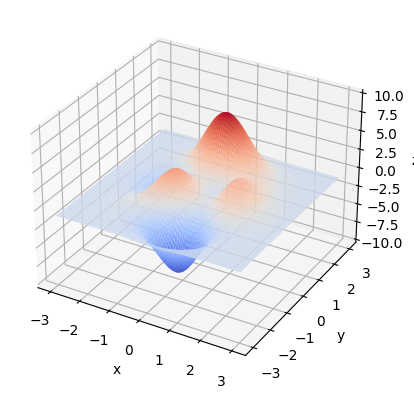

max_fitness: 0.002020031642342545
最优的基因型： [1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0]
(x, y): (-0.015600980258046349, 1.5769546375843664)


In [12]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

DNA_SIZE = 24
POP_SIZE = 200
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.005
N_GENERATIONS = 50
X_BOUND = [-3, 3]
Y_BOUND = [-3, 3]


def F(x, y):
    return 3 * (1 - x) ** 2 * np.exp(-(x ** 2) - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(
        -x ** 2 - y ** 2) - 1 / 3 ** np.exp(-(x + 1) ** 2 - y ** 2)


def plot_3d(ax):
    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    ax.set_zlim(-10, 10)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.pause(3)
    plt.show()


def get_fitness(pop):
    x, y = translateDNA(pop)
    pred = F(x, y)
    return (pred - np.min(
        pred)) + 1e-3  #减去最小的适应度是为了防止适应度出现负数，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)],最后在加上一个很小的数防止出现为0的适应度


def translateDNA(pop):  #pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
    x_pop = pop[:, 1::2]  #奇数列表示X
    y_pop = pop[:, ::2]  #偶数列表示y

    #pop:(POP_SIZE,DNA_SIZE)*(DNA_SIZE,1) --> (POP_SIZE,1)
    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (Y_BOUND[1] - Y_BOUND[0]) + Y_BOUND[0]
    return x, y


def crossover_and_mutation(pop, CROSSOVER_RATE=0.8):
    new_pop = []
    for father in pop:  #遍历种群中的每一个个体，将该个体作为父亲
        child = father  #孩子先得到父亲的全部基因（这里我把一串二进制串的那些0，1称为基因）
        if np.random.rand() < CROSSOVER_RATE:  #产生子代时不是必然发生交叉，而是以一定的概率发生交叉
            mother = pop[np.random.randint(POP_SIZE)]  #再种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low=0, high=DNA_SIZE * 2)  #随机产生交叉的点
            child[cross_points:] = mother[cross_points:]  #孩子得到位于交叉点后的母亲的基因
        mutation(child)  #每个后代有一定的机率发生变异
        new_pop.append(child)

    return new_pop


def mutation(child, MUTATION_RATE=0.003):
    if np.random.rand() < MUTATION_RATE:  #以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(0, DNA_SIZE * 2)  #随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point] ^ 1  #将变异点的二进制为反转


def select(pop, fitness):  # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=(fitness) / (fitness.sum()))
    return pop[idx]


def print_info(pop):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print("max_fitness:", fitness[max_fitness_index])
    x, y = translateDNA(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))


fig = plt.figure()
ax = plt.axes(projection='3d')
plt.ion()  #将画图模式改为交互模式，程序遇到plt.show不会暂停，而是继续执行
plot_3d(ax)
pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))  #matrix (POP_SIZE, DNA_SIZE)
for _ in range(N_GENERATIONS):  #迭代N代
    x, y = translateDNA(pop)
    if 'sca' in locals():
        sca.remove()
    sca = ax.scatter(x, y, F(x, y), c='black', marker='o');
    plt.show();
    plt.pause(0.1)
    pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
    #F_values = F(translateDNA(pop)[0], translateDNA(pop)[1])#x, y --> Z matrix
    fitness = get_fitness(pop)
    pop = select(pop, fitness)  #选择生成新的种群
print_info(pop)
plt.ioff()
plot_3d(ax)

### 2. 求解非线性规划问题

方程：
$$
f(x) = (x_1-2)^2+(x_2-1)^2\\
s.t.
\begin{cases}
x_1-2x_2+1 \ge 0 \\
\frac{x_{1}^2}{4} - x_{2}^{2}+1 \ge 0
\end{cases}
$$

使用Lingo求解的结果为：
$$
\begin{cases}
x_1 = 2 \\
x_2 = 1 \\
\end{cases}
$$

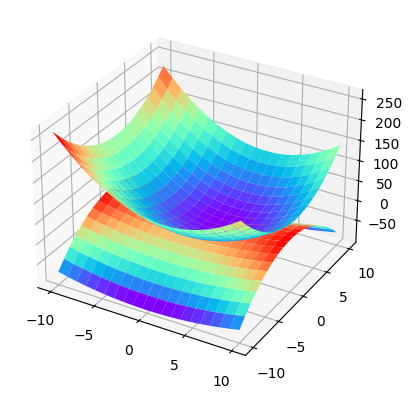

In [191]:
def func(x, y):
    return (x - 2) ** 2 + (y - 1) ** 2


def subject_func_2(x, y):
    return x ** 2 / 4 - y ** 2 + 1


n = 10

fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-n, n, 20)
y = np.linspace(-n, n, 20)

xx, yy = np.meshgrid(x, y)

surf1 = ax.plot_surface(xx, yy, func(xx, yy), rstride=1, cstride=1, cmap='rainbow')
surf2 = ax.plot_surface(xx, yy, subject_func_2(xx, yy), cmap='rainbow')
# surf = ax.plot_surface(xx, yy, subject_func_2(xx, yy), cmap='BuGn')
# ax.contourf(xx, yy, func(xx, yy), offset=2, cmap='BuGn')
# fig.colorbar(surf1,surf2)
plt.show()

In [173]:
## 使用模拟退火算法求解非线性规划问题
def subject_func(x, y):
    if x - 2 * y + 1 >= 0 and x ** 2 / 4 - y ** 2 + 1 >= 0:
        return True
    else:
        return False


## 初始化
while True:
    x = np.random.uniform(-100, 100)

T = 1000
while T > 1:
    for _ in range(1000):
        dE = func()

SyntaxError: invalid syntax (2977898419.py, line 1)

### 使用遗传算法求解旅行商问题

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
li = []

with open(r'D:\pycharm-python\datasets\tsp.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        line = line.strip('\n').split()
        li.append(line)

In [56]:
li = [[int(i) for i in little_li] for little_li in li]
dist_matrix = np.array(li)

In [57]:
dist_matrix

array([[    1,  9860, 14152],
       [    2,  9396, 14616],
       [    3, 11252, 14848],
       [    4, 11020, 13456],
       [    5,  9512, 15776],
       [    6, 10788, 13804],
       [    7, 10208, 14384],
       [    8, 11600, 13456],
       [    9, 11252, 14036],
       [   10, 10672, 15080],
       [   11, 11136, 14152],
       [   12,  9860, 13108],
       [   13, 10092, 14964],
       [   14,  9512, 13340],
       [   15, 10556, 13688],
       [   16,  9628, 14036],
       [   17, 10904, 13108],
       [   18, 11368, 12644],
       [   19, 11252, 13340],
       [   20, 10672, 13340],
       [   21, 11020, 13108],
       [   22, 11020, 13340],
       [   23, 11136, 13572],
       [   24, 11020, 13688],
       [   25,  8468, 11136],
       [   26,  8932, 12064],
       [   27,  9512, 12412],
       [   28,  7772, 11020],
       [   29,  8352, 10672],
       [   30,  9164, 12876],
       [   31,  9744, 12528],
       [   32,  8352, 10324],
       [   33,  8236, 11020],
       [  

In [81]:
x, y = dist_matrix[3 - 1][1:]
x, y

(11252, 14848)

In [0]:
# 定义基本常量
POP_SIZE = 100
GENERATION = 128
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.05

In [77]:

pop = []
init_path = [i for i in range(1, 129)]
for i in range(POP_SIZE):
    np.random.shuffle(init_path)
    pop.append(init_path.copy())  # 此处必须使用copy，否则浅拷贝会指向同一个地址

In [78]:
pop_arr = np.array(pop)

In [79]:
pop_arr.shape

(100, 128)

In [82]:
for child in pop_arr:
    print(child.shape)

(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)
(128,)


在tsp问题的遗传算法求解过程中，个体为单条路径，无需使用二进制或者十进制进行编码。
1. 首先，给出适应度函数
2. 其次，写出交叉与变异函数。
3. 最后，进行循环，选择出最优的个体。

In [ ]:
def func(path):
    """
    该函数用于评估路径的优劣
    :param pop:
    :return:适应度。整条路经距离的倒数。
    """
    length = 0
    for i in range(len(path)):
        idx = path[i]
        if i < 127:
            next_idx = path[i + 1]
        else:
            next_idx = 0
        x, y = dist_matrix[idx - 1][1:]
        x_next, y_next = dist_matrix[next_idx - 1][1:]
        distance = np.sqrt((x - x_next) ** 2 + (y - y_next) ** 2)
        length += distance
    return 1 / length


def tsp_cross_mutation(pop, CROSSOVER_RATE=0.8):
    new_pop = []
    for father in pop:
        child = father
        if np.random.rand() < CROSSOVER_RATE:
            mother_idx  = np.random.randint(POP_SIZE)
            mother = pop[mother_idx]
            cross_point1,cross_point2 = np.random.randint(1,128,size=2)
            cross_point1,cross_point2 = np.min([cross_point2,cross_point1]),np.max([cross_point2,cross_point1])
            if cross_point1 != cross_point2:
                child[cross_point1:cross_point2],mother[cross_point1,cross_point2] = \
                    mother[cross_point1,cross_point2],child[cross_point1,cross_point2]
        tsp_mutation(child)
    new_pop.append(child)
    return new_pop

def tsp_mutation(child, MUTATION_RATE=0.03):
    if np.random.rand()<MUTATION_RATE:
        idx1,idx2 = np.random.randint(128,size=2)
        child[idx1],child[idx2] = child[idx2],child[idx1]
    return child


In [ ]:
np.random.randint(1,128,size=2)

In [88]:
test_arr = np.arange(12)
test_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
test_arr[2],test_arr[8] = test_arr[8],test_arr[2]
test_arr

array([ 0,  1,  8,  3,  4,  5,  6,  7,  8,  9, 10, 11])